In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings 
warnings.filterwarnings('ignore')
from scipy import stats

In [4]:
df= pd.read_csv('/kaggle/input/detect-fraud-transactions/Payment_Data.csv')
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
0,29,1,4.745402,paypal,28.204861,shopping,0.0,0
1,725,1,4.742303,storecredit,0.000000,electronics,0.0,0
2,845,1,4.921318,creditcard,0.000000,food,1.0,0
3,503,1,4.886641,creditcard,0.000000,electronics,1.0,0
4,2000,1,5.040929,creditcard,0.000000,shopping,0.0,0


In [5]:
df.shape

(39221, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  object 
 4   paymentMethodAgeDays  39221 non-null  float64
 5   Category              39126 non-null  object 
 6   isWeekend             38661 non-null  float64
 7   label                 39221 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 2.4+ MB


In [7]:
df.describe()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,label
count,39221.000000,39221.000000,39221.000000,39221.000000,38661.000000,39221.000000
mean,857.563984,1.084751,4.748232,122.641326,0.499547,0.014278
std,804.788212,0.566899,0.389360,283.569177,0.500006,0.118636
min,1.000000,1.000000,0.421214,0.000000,0.000000,0.000000
25%,72.000000,1.000000,4.742303,0.000000,0.000000,0.000000
50%,603.000000,1.000000,4.886641,0.012500,0.000000,0.000000
75%,1804.000000,1.000000,4.962055,87.510417,1.000000,0.000000
max,2000.000000,29.000000,5.040929,1999.580556,1.000000,1.000000


In [8]:
df.columns

Index(['accountAgeDays', 'numItems', 'localTime', 'paymentMethod',
       'paymentMethodAgeDays', 'Category', 'isWeekend', 'label'],
      dtype='object')

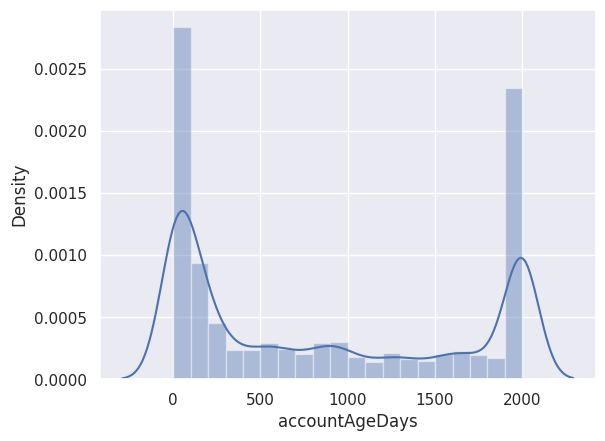

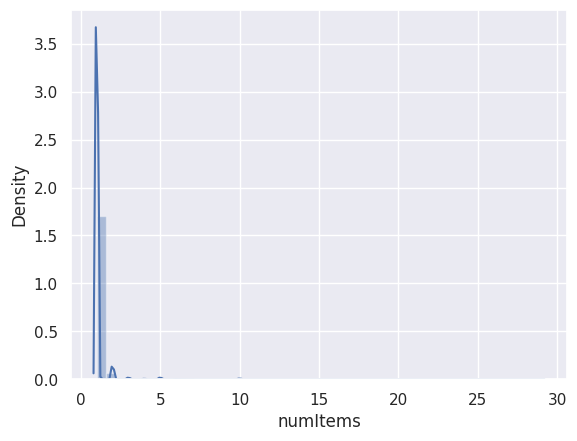

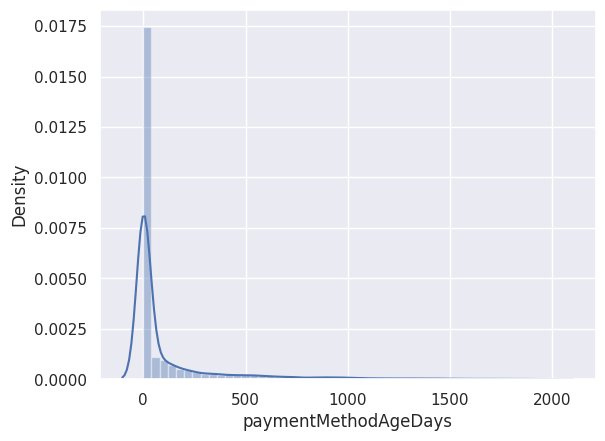

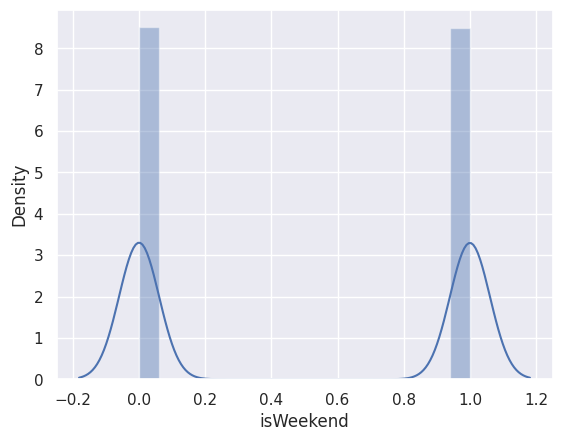

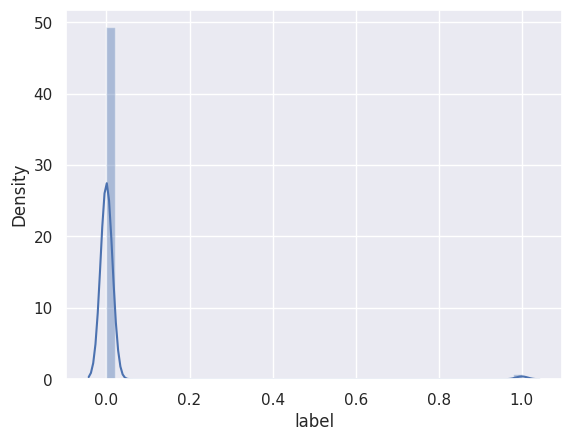

In [9]:
# check outlier with all variable at one go
def distplots(col):
    sns.distplot(df[col])
    plt.show()
    
for i in list(df.columns[0:2]):
    distplots(i)
for i in list(df.columns[4:5]):
    distplots(i)    
for i in list(df.columns[6:]):
    distplots(i)       

<Axes: >

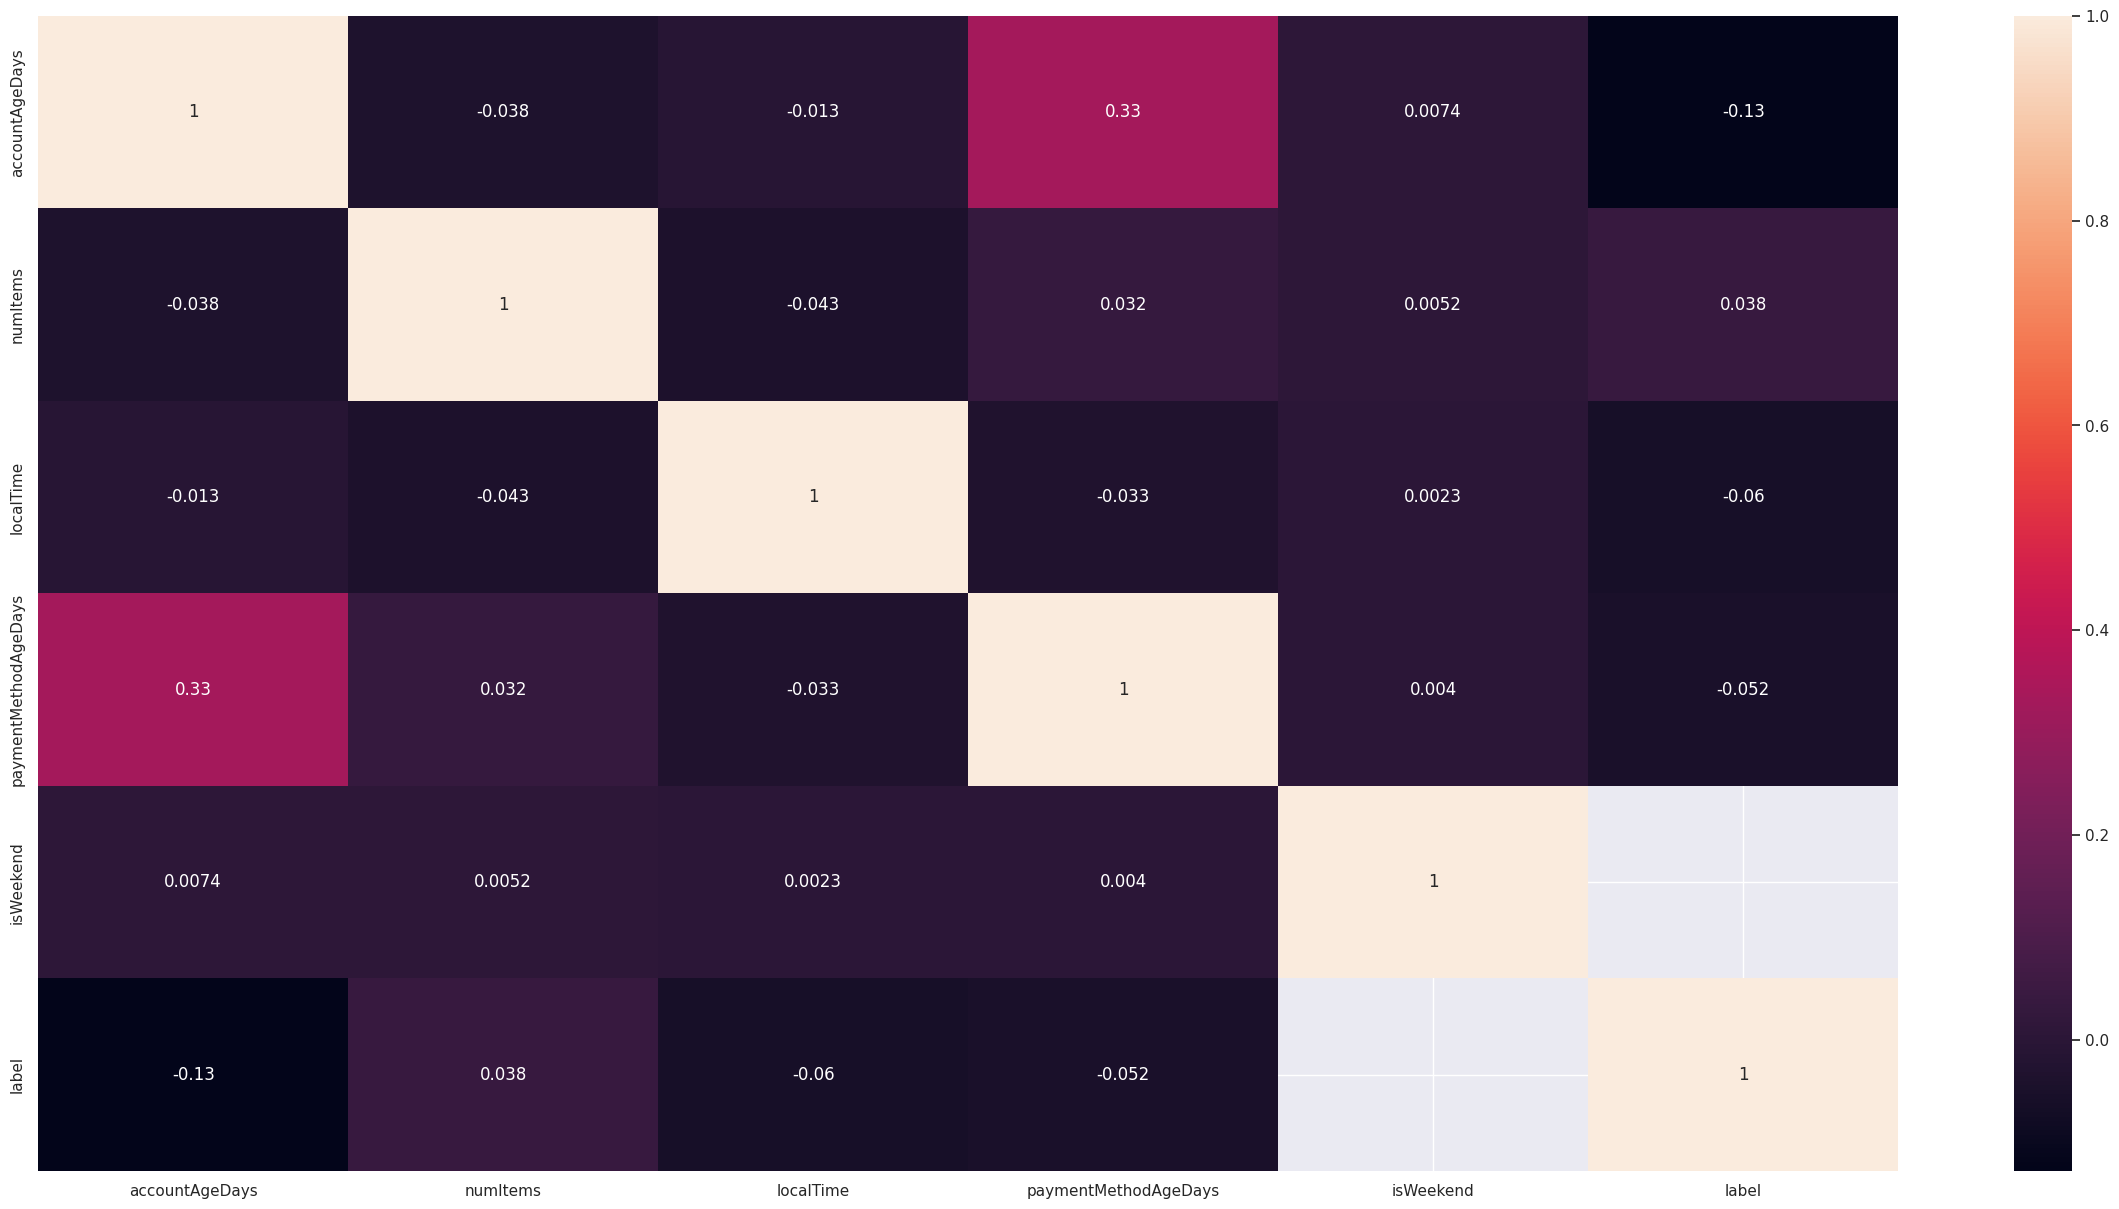

In [10]:
x=df.select_dtypes("number")
plt.figure(figsize=(30,15))
sns.heatmap(x.corr(),annot=True)

In [11]:
x.corr()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,label
accountAgeDays,1.000000,-0.037562,-0.012600,0.330909,0.007392,-0.128098
numItems,-0.037562,1.000000,-0.042563,0.031683,0.005175,0.038116
localTime,-0.012600,-0.042563,1.000000,-0.033076,0.002256,-0.059505
paymentMethodAgeDays,0.330909,0.031683,-0.033076,1.000000,0.004031,-0.052047
isWeekend,0.007392,0.005175,0.002256,0.004031,1.000000,NaN
label,-0.128098,0.038116,-0.059505,-0.052047,NaN,1.000000


In [ ]:
#check all unique values
for i in df.columns:
  print("***********************************************",i,"******************************")
  print()
  print(set(df[i].tolist()))
  print()

In [ ]:
df['label'].value_counts()

In [14]:
df['isWeekend'].value_counts()

isWeekend
0.0    19348
1.0    19313
Name: count, dtype: int64

In [15]:
    df.isnull().sum()

accountAgeDays            0
numItems                  0
localTime                 0
paymentMethod             0
paymentMethodAgeDays      0
Category                 95
isWeekend               560
label                     0
dtype: int64

In [16]:
df.isnull().sum()/len(df)*100

accountAgeDays          0.000000
numItems                0.000000
localTime               0.000000
paymentMethod           0.000000
paymentMethodAgeDays    0.000000
Category                0.242217
isWeekend               1.427807
label                   0.000000
dtype: float64

# missing values are less than 25%, so cannot drop columns
# Category - char , so handling missing values by mode

In [17]:
df['Category'].value_counts()

Category
shopping       13328
food           12964
electronics    12834
Name: count, dtype: int64

In [18]:
print(set(df['Category'].tolist()))

{'food', 'electronics', nan, 'shopping'}


In [19]:
df['Category'].mode()

0    shopping
Name: Category, dtype: object

In [20]:
# handling missing values by mode 

df['Category']= df['Category'].fillna('shopping')


In [21]:
df['Category'].value_counts()

Category
shopping       13423
food           12964
electronics    12834
Name: count, dtype: int64

In [22]:
print(set(df['Category'].tolist()))

{'food', 'electronics', 'shopping'}


In [23]:
df.isnull().sum()

accountAgeDays            0
numItems                  0
localTime                 0
paymentMethod             0
paymentMethodAgeDays      0
Category                  0
isWeekend               560
label                     0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  object 
 4   paymentMethodAgeDays  39221 non-null  float64
 5   Category              39221 non-null  object 
 6   isWeekend             38661 non-null  float64
 7   label                 39221 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 2.4+ MB


# Encoding
# paymentMethod , Category

In [25]:
df['paymentMethod'].value_counts()

paymentMethod
creditcard     28004
paypal          9303
storecredit     1914
Name: count, dtype: int64

In [26]:
df['Category'].value_counts()

Category
shopping       13423
food           12964
electronics    12834
Name: count, dtype: int64

In [27]:
df['paymentMethod'].value_counts()

paymentMethod
creditcard     28004
paypal          9303
storecredit     1914
Name: count, dtype: int64

In [28]:
df = pd.get_dummies(df, columns=['paymentMethod','Category'])
df.head()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,label,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit,Category_electronics,Category_food,Category_shopping
0,29,1,4.745402,28.204861,0.0,0,False,True,False,False,False,True
1,725,1,4.742303,0.000000,0.0,0,False,False,True,True,False,False
2,845,1,4.921318,0.000000,1.0,0,True,False,False,False,True,False
3,503,1,4.886641,0.000000,1.0,0,True,False,False,True,False,False
4,2000,1,5.040929,0.000000,0.0,0,True,False,False,False,False,True


In [29]:
df = df. drop(['paymentMethod_storecredit','Category_electronics'],axis=1)
df.head()


,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,label,paymentMethod_creditcard,paymentMethod_paypal,Category_food,Category_shopping
0,29,1,4.745402,28.204861,0.0,0,False,True,False,True
1,725,1,4.742303,0.000000,0.0,0,False,False,False,False
2,845,1,4.921318,0.000000,1.0,0,True,False,True,False
3,503,1,4.886641,0.000000,1.0,0,True,False,False,False
4,2000,1,5.040929,0.000000,0.0,0,True,False,False,True


In [30]:
df.shape

(39221, 10)

In [31]:
df['paymentMethod_creditcard'] = df['paymentMethod_creditcard'].astype(int)
df['paymentMethod_paypal'] = df['paymentMethod_paypal'].astype(int)
df['Category_food'] = df['Category_food'].astype(int)
df['Category_shopping'] = df['Category_shopping'].astype(int)

In [32]:
df.head()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,label,paymentMethod_creditcard,paymentMethod_paypal,Category_food,Category_shopping
0,29,1,4.745402,28.204861,0.0,0,0,1,0,1
1,725,1,4.742303,0.000000,0.0,0,0,0,0,0
2,845,1,4.921318,0.000000,1.0,0,1,0,1,0
3,503,1,4.886641,0.000000,1.0,0,1,0,0,0
4,2000,1,5.040929,0.000000,0.0,0,1,0,0,1


# Handling Outliers

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   accountAgeDays            39221 non-null  int64  
 1   numItems                  39221 non-null  int64  
 2   localTime                 39221 non-null  float64
 3   paymentMethodAgeDays      39221 non-null  float64
 4   isWeekend                 38661 non-null  float64
 5   label                     39221 non-null  int64  
 6   paymentMethod_creditcard  39221 non-null  int64  
 7   paymentMethod_paypal      39221 non-null  int64  
 8   Category_food             39221 non-null  int64  
 9   Category_shopping         39221 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 3.0 MB


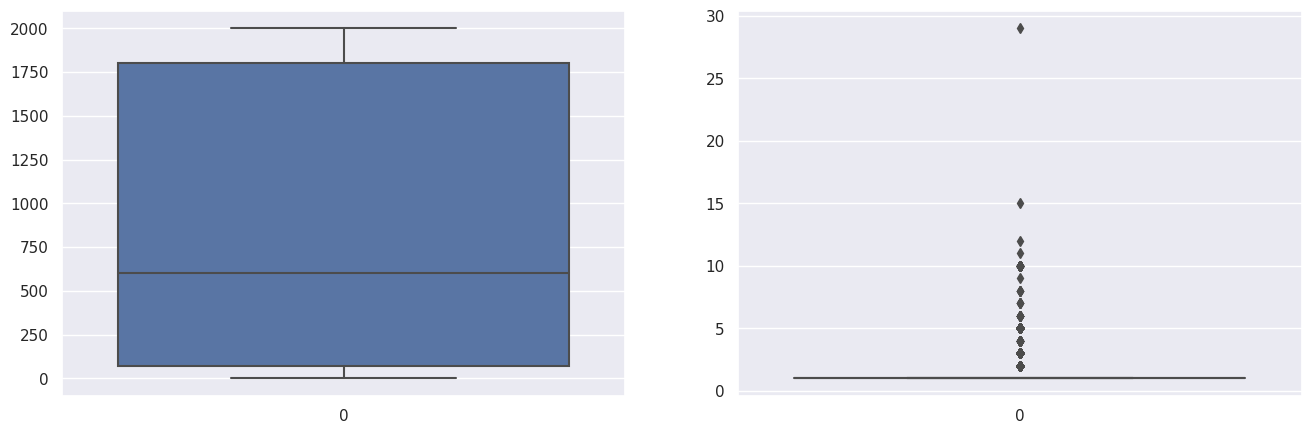

In [34]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.boxplot(df['accountAgeDays'])

plt.subplot(1,2,2)
sns.boxplot(df['numItems'])

plt.show()

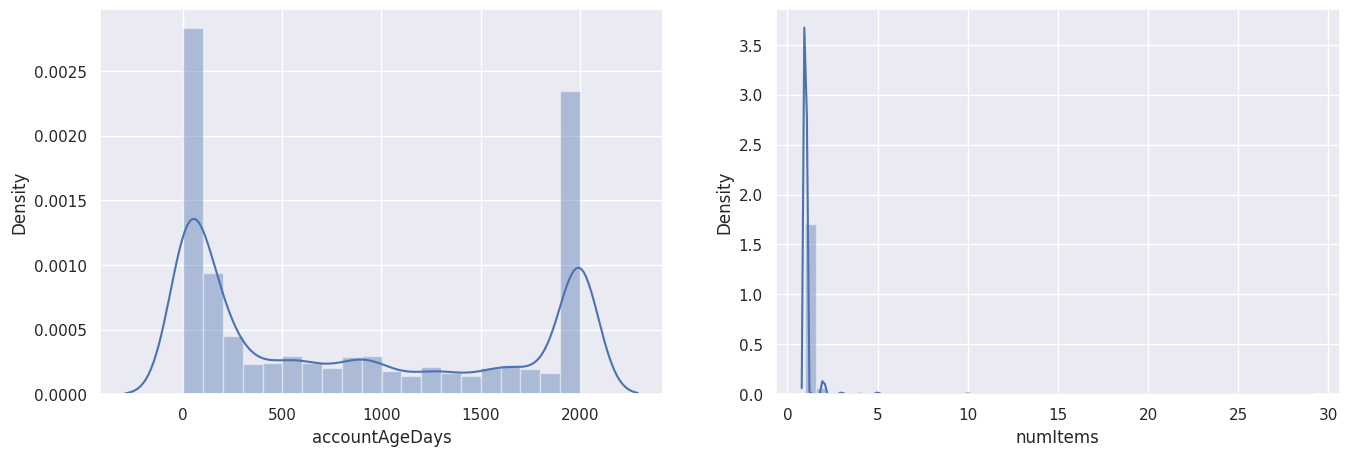

In [35]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['accountAgeDays'])

plt.subplot(1,2,2)
sns.distplot(df['numItems'])

plt.show()

# IQR

In [36]:
df['numItems'].value_counts()

numItems
1     37398
2      1348
5       168
3       164
10       71
4        42
6        15
8         5
7         5
12        1
15        1
29        1
9         1
11        1
Name: count, dtype: int64

In [37]:
Q3 = df['numItems'].quantile(0.75)
Q1 = df['numItems'].quantile(0.25)
IQR = Q3-Q1
print(Q3, Q1,IQR)

1.0 1.0 0.0


In [38]:
# Finding the boundary values
# print("Highest point", df['numItems'].mean() + 3*df['numItems'].std())
print("Highest point", df['numItems'].quantile(0.75) + 1.5 * ( df['numItems'].quantile(0.75) -  df['numItems'].quantile(0.25)))


print()

# print("Lowest point", df['numItems'].mean() - 3*df['numItems'].std())
print("Lowest point", df['numItems'].quantile(0.25) - 1.5 * ( df['numItems'].quantile(0.75) -  df['numItems'].quantile(0.25)))


Highest point 1.0

Lowest point 1.0


In [39]:
df[(df['numItems'] > 1) | (df['numItems'] < 1)]['numItems']

73       2
98       3
109      4
116      2
135      2
        ..
39131    2
39148    2
39157    2
39184    2
39214    2
Name: numItems, Length: 1823, dtype: int64

In [40]:
z_scores = stats.zscore(df['numItems'])

# Print z-scores that are greater than 3 or less than -3
print(z_scores[(z_scores > 3) | (z_scores < -3)])

98        3.378512
109       5.142519
172       5.142519
182       6.906525
183       6.906525
           ...    
38708     6.906525
38897    15.726557
38901     6.906525
39059     8.670531
39111     3.378512
Name: numItems, Length: 475, dtype: float64


In [41]:
print(set(df['numItems'].tolist()))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 29}


# numItems column displays the number of items.
# Acc to IQR,box plot and Z score methods, this has outliers
# eventhough it has outliers, ignoring it now because of its distribution (1 is repeating many times)

<Axes: >

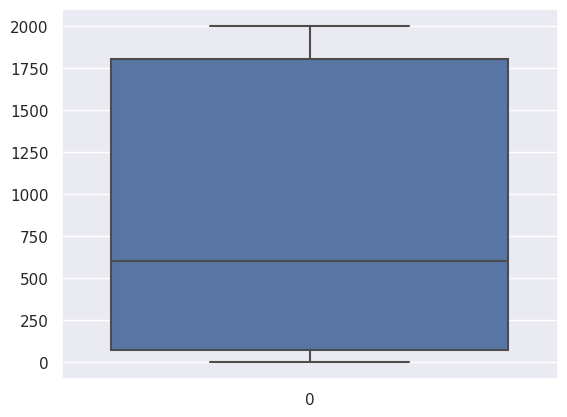

In [42]:
sns.boxplot(df['accountAgeDays'])

In [43]:
print(set(df['accountAgeDays'].tolist()))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [44]:
from scipy import stats

# Assuming 'column_to_calculate' is the column for which you want to calculate the z-score
# Calculate the z-score using scipy.stats.zscore
# print(stats.zscore(df['numItems']))
z_scores = stats.zscore(df['accountAgeDays'])

# Print z-scores that are greater than 3 or less than -3
print(z_scores[(z_scores > 3) | (z_scores < -3)])

Series([], Name: accountAgeDays, dtype: float64)


In [45]:
# Finding the boundary values
# print("Highest point", df['numItems'].mean() + 3*df['numItems'].std())
print("Highest point", df['accountAgeDays'].quantile(0.75) + 1.5 * ( df['accountAgeDays'].quantile(0.75) -  df['accountAgeDays'].quantile(0.25)))


print()

# print("Lowest point", df['accountAgeDays'].mean() - 3*df['accountAgeDays'].std())
print("Lowest point", df['accountAgeDays'].quantile(0.25) - 1.5 * ( df['accountAgeDays'].quantile(0.75) -  df['accountAgeDays'].quantile(0.25)))


Highest point 4402.0

Lowest point -2526.0


In [46]:
df[(df['accountAgeDays'] > 4402.0) | (df['accountAgeDays'] < -2526.0)]['accountAgeDays']

Series([], Name: accountAgeDays, dtype: int64)

# accountAgeDays - has no outliers, cocncluded from boxplot, IQR and zscore

In [47]:
df.head(1)

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,label,paymentMethod_creditcard,paymentMethod_paypal,Category_food,Category_shopping
0,29,1,4.745402,28.204861,0.0,0,0,1,0,1


In [48]:

print(set(df['localTime'].tolist()))

{0.4212135, 2.596228, 3.483951, 4.886641, 4.921318, 4.745402, 4.742303, 5.040929, 4.962055, 4.921349, 4.876771, 4.748314, 4.461622, 5.034622, 3.066058, 4.895263, 4.057414, 4.965339, 4.52458, 5.017904, 3.575983, 3.954522, 4.505662, 4.836982, 2.94894}


In [49]:
# import datetime

# df['localTime'] = df['localTime'].apply(lambda x: (datetime.datetime.min + datetime.timedelta(hours=x)).time().strftime("%I:%M %p"))

# print(set(df['localTime'].tolist()))

In [50]:
df.head()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,label,paymentMethod_creditcard,paymentMethod_paypal,Category_food,Category_shopping
0,29,1,4.745402,28.204861,0.0,0,0,1,0,1
1,725,1,4.742303,0.000000,0.0,0,0,0,0,0
2,845,1,4.921318,0.000000,1.0,0,1,0,1,0
3,503,1,4.886641,0.000000,1.0,0,1,0,0,0
4,2000,1,5.040929,0.000000,0.0,0,1,0,0,1


# localTime - denotes time and time can have any value, so not handling outlier for this

In [51]:
print(set(df['paymentMethodAgeDays'].tolist()))

{0.0, 1.0, 2.0625, 2.15625, 0.1875, 4.03125, 6.892361111, 5.78125, 1.59375, 0.15625, 0.03125, 11.0, 1.65625, 0.09375, 14.14791667, 14.0625, 15.96875, 17.32430556, 9.763888889, 10.03125, 11.8125, 13.9375, 22.1875, 15.375, 24.07430556, 25.94583333, 17.05416667, 18.35555556, 19.77291667, 29.16736111, 29.8125, 0.625, 32.10416667, 32.44444444, 32.67569444, 33.3125, 36.44027778, 37.42708333, 37.0625, 38.09652778, 32.60069444, 41.80138889, 42.99097222, 35.38194444, 44.86388889, 44.9875, 45.04027778, 45.0625, 48.73888889, 9.75, 50.625, 47.00694444, 52.84375, 10.1875, 54.0, 55.87638889, 2.03125, 57.02013889, 57.79097222, 59.01111111, 58.29236111, 59.97569444, 60.41319444, 63.95763889, 64.60625, 65.85625, 65.23680556, 66.7125, 63.22708333, 68.09930556, 65.37291667, 71.45555556, 72.37638889, 72.98333333, 74.00208333, 71.94305556, 76.21458333, 77.32847222, 70.46875, 79.71736111, 80.87708333, 81.95416667, 82.03055556, 82.78611111, 81.77361111, 85.37361111, 86.14861111, 85.86805556, 88.04791667, 86.

In [52]:
z_scores = stats.zscore(df['paymentMethodAgeDays'])
print(z_scores[(z_scores > 3) | (z_scores < -3)].shape[0])
# Print z-scores that are greater than 3 or less than -3
print(z_scores[(z_scores > 3) | (z_scores < -3)])

1184
20       3.019095
39       3.028242
46       3.597986
59       3.216294
145      5.784757
           ...   
39138    3.236402
39153    5.032244
39161    5.682013
39176    4.507569
39185    5.121605
Name: paymentMethodAgeDays, Length: 1184, dtype: float64


In [53]:
upper_limit =  df['paymentMethodAgeDays'].quantile(0.75) + 1.5 * ( df['paymentMethodAgeDays'].quantile(0.75) -  df['paymentMethodAgeDays'].quantile(0.25))
lower_limit = df['paymentMethodAgeDays'].quantile(0.25) - 1.5 * ( df['paymentMethodAgeDays'].quantile(0.75) -  df['paymentMethodAgeDays'].quantile(0.25))

print(upper_limit,lower_limit)

218.776041675 -131.265625005


In [54]:
df[(df['paymentMethodAgeDays'] > upper_limit) | (df['paymentMethodAgeDays'] <lower_limit)]['paymentMethodAgeDays']

19       248.774306
20       978.752778
27       503.425000
28       635.641667
29       948.806944
            ...    
39208    357.716667
39209    258.222222
39215    813.097222
39217    377.930556
39219    236.082639
Name: paymentMethodAgeDays, Length: 6350, dtype: float64

In [55]:
df[(df['paymentMethodAgeDays'] > upper_limit) | (df['paymentMethodAgeDays'] <lower_limit)]['paymentMethodAgeDays'].shape[0]

6350

In [56]:
(6350  / 39221 )*100
# 90/100

16.19030621350807

In [57]:
df['paymentMethodAgeDays'].describe()

count    39221.000000
mean       122.641326
std        283.569177
min          0.000000
25%          0.000000
50%          0.012500
75%         87.510417
max       1999.580556
Name: paymentMethodAgeDays, dtype: float64

<Axes: >

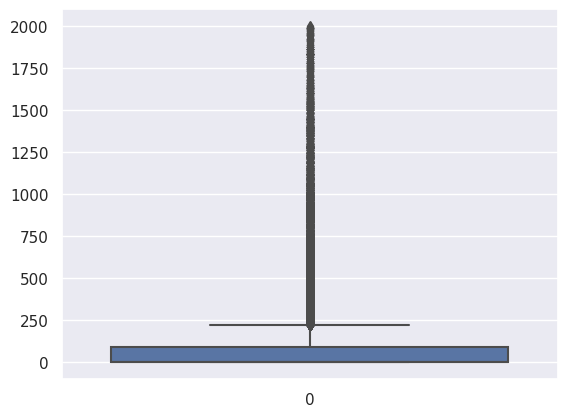

In [58]:
sns.boxplot(df['paymentMethodAgeDays'])

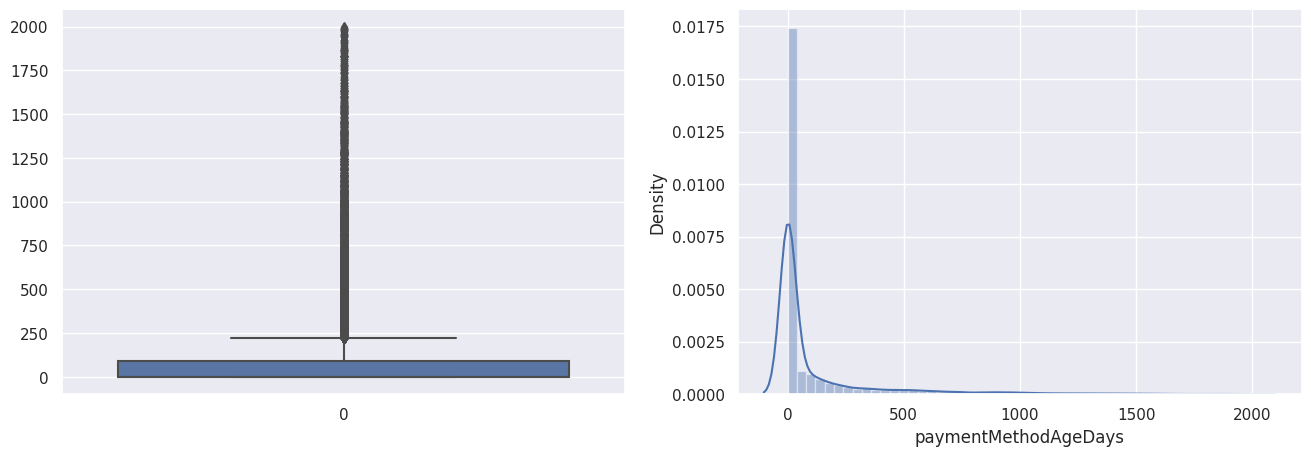

In [59]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.boxplot(df['paymentMethodAgeDays'])

plt.subplot(1,2,2)
sns.distplot(df['paymentMethodAgeDays'])

plt.show()



In [60]:
# capping method or transforming approach

df['paymentMethodAgeDays'] = np.where(df['paymentMethodAgeDays'] > upper_limit, upper_limit,
                          np.where(df['paymentMethodAgeDays'] < lower_limit, lower_limit, df['paymentMethodAgeDays']))

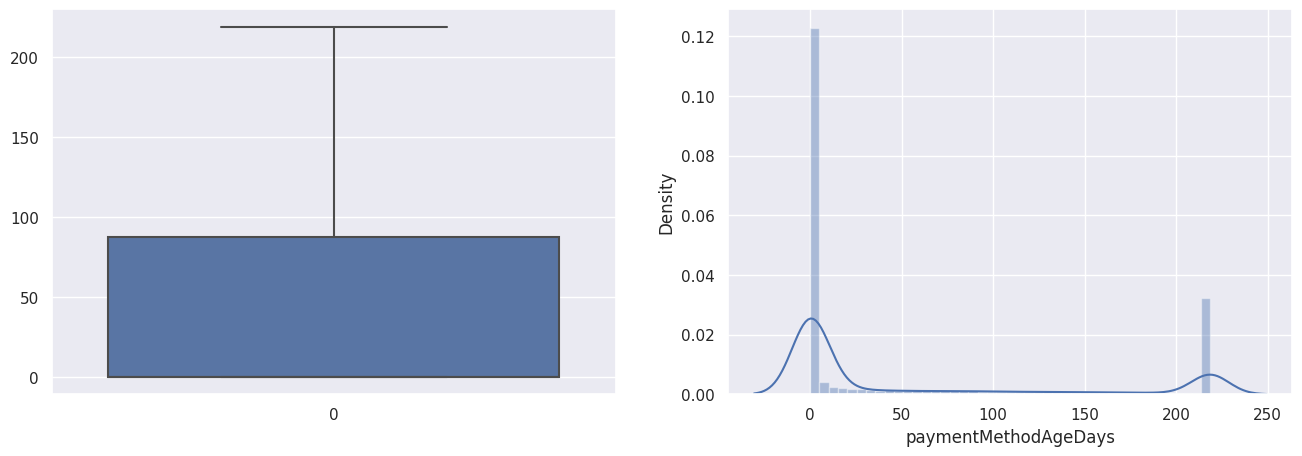

In [61]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.boxplot(df['paymentMethodAgeDays'])

plt.subplot(1,2,2)
sns.distplot(df['paymentMethodAgeDays'])

plt.show()



In [62]:
df.head()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,label,paymentMethod_creditcard,paymentMethod_paypal,Category_food,Category_shopping
0,29,1,4.745402,28.204861,0.0,0,0,1,0,1
1,725,1,4.742303,0.000000,0.0,0,0,0,0,0
2,845,1,4.921318,0.000000,1.0,0,1,0,1,0
3,503,1,4.886641,0.000000,1.0,0,1,0,0,0
4,2000,1,5.040929,0.000000,0.0,0,1,0,0,1


In [63]:
df[(df['paymentMethodAgeDays'] > upper_limit) | (df['paymentMethodAgeDays'] < lower_limit)]['paymentMethodAgeDays']

Series([], Name: paymentMethodAgeDays, dtype: float64)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   accountAgeDays            39221 non-null  int64  
 1   numItems                  39221 non-null  int64  
 2   localTime                 39221 non-null  float64
 3   paymentMethodAgeDays      39221 non-null  float64
 4   isWeekend                 38661 non-null  float64
 5   label                     39221 non-null  int64  
 6   paymentMethod_creditcard  39221 non-null  int64  
 7   paymentMethod_paypal      39221 non-null  int64  
 8   Category_food             39221 non-null  int64  
 9   Category_shopping         39221 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 3.0 MB


In [65]:
# paymentMethod_creditcard
# paymentMethod_paypal
print(set(df['paymentMethod_creditcard'].tolist()))

{0, 1}


In [66]:
upper_limit =  df['paymentMethod_creditcard'].quantile(0.75) + 1.5 * ( df['paymentMethod_creditcard'].quantile(0.75) -  df['paymentMethod_creditcard'].quantile(0.25))
lower_limit = df['paymentMethod_creditcard'].quantile(0.25) - 1.5 * ( df['paymentMethod_creditcard'].quantile(0.75) -  df['paymentMethod_creditcard'].quantile(0.25))

print(upper_limit,lower_limit)

df[(df['paymentMethod_creditcard'] > upper_limit) | (df['paymentMethod_creditcard'] <lower_limit)]['paymentMethod_creditcard']

2.5 -1.5


Series([], Name: paymentMethod_creditcard, dtype: int64)

In [67]:

z_scores = stats.zscore(df['paymentMethod_creditcard'])
print(z_scores[(z_scores > 3) | (z_scores < -3)].shape[0])
# Print z-scores that are greater than 3 or less than -3
print(z_scores[(z_scores > 3) | (z_scores < -3)])

0
Series([], Name: paymentMethod_creditcard, dtype: float64)


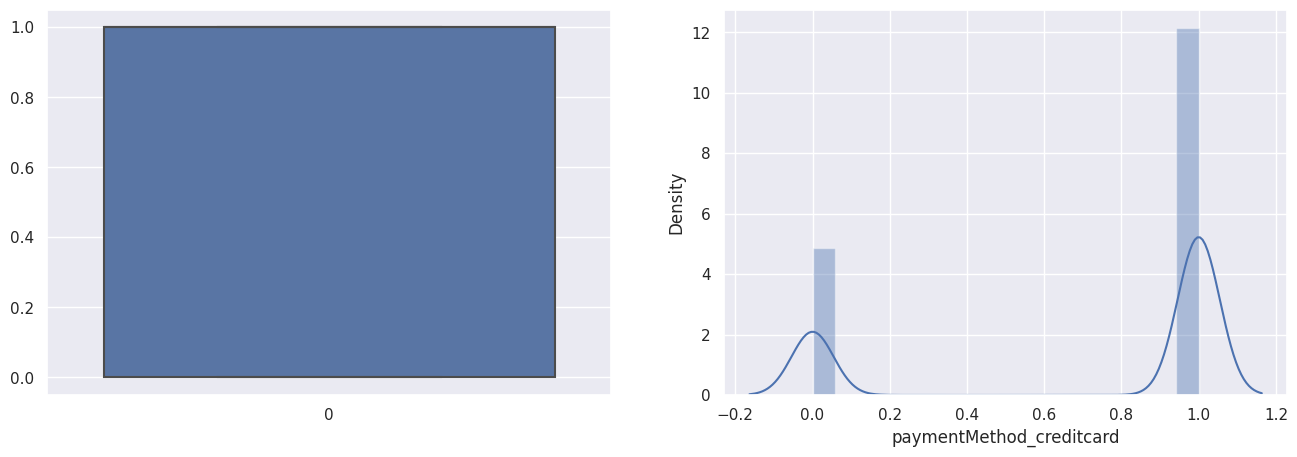

In [68]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.boxplot(df['paymentMethod_creditcard'])

plt.subplot(1,2,2)
sns.distplot(df['paymentMethod_creditcard'])

plt.show()



In [69]:
# paymentMethod_creditcard
# paymentMethod_paypal
print(set(df['paymentMethod_paypal'].tolist()))

{0, 1}


In [70]:
upper_limit =  df['paymentMethod_paypal'].quantile(0.75) + 1.5 * ( df['paymentMethod_paypal'].quantile(0.75) -  df['paymentMethod_paypal'].quantile(0.25))
lower_limit = df['paymentMethod_paypal'].quantile(0.25) - 1.5 * ( df['paymentMethod_paypal'].quantile(0.75) -  df['paymentMethod_paypal'].quantile(0.25))

print(upper_limit,lower_limit)

df[(df['paymentMethod_paypal'] > upper_limit) | (df['paymentMethod_paypal'] <lower_limit)]['paymentMethod_paypal']

0.0 0.0


0        1
5        1
6        1
10       1
15       1
        ..
39190    1
39193    1
39198    1
39205    1
39220    1
Name: paymentMethod_paypal, Length: 9303, dtype: int64

In [71]:

z_scores = stats.zscore(df['paymentMethod_paypal'])
print(z_scores[(z_scores > 3) | (z_scores < -3)].shape[0])
# Print z-scores that are greater than 3 or less than -3
print(z_scores[(z_scores > 3) | (z_scores < -3)])

0
Series([], Name: paymentMethod_paypal, dtype: float64)


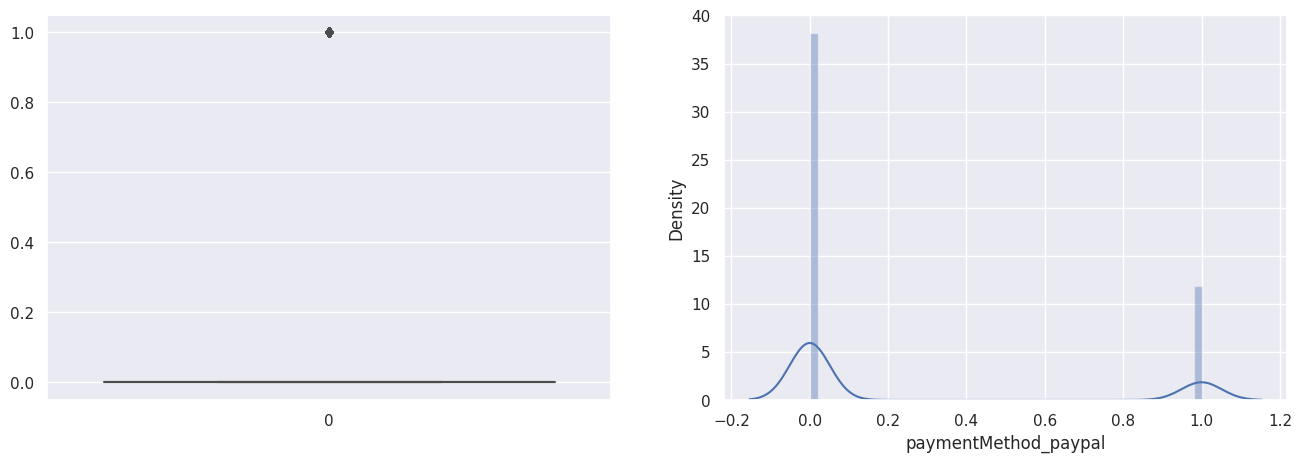

In [72]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.boxplot(df['paymentMethod_paypal'])

plt.subplot(1,2,2)
sns.distplot(df['paymentMethod_paypal'])

plt.show()



In [73]:
df.columns

Index(['accountAgeDays', 'numItems', 'localTime', 'paymentMethodAgeDays',
       'isWeekend', 'label', 'paymentMethod_creditcard',
       'paymentMethod_paypal', 'Category_food', 'Category_shopping'],
      dtype='object')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   accountAgeDays            39221 non-null  int64  
 1   numItems                  39221 non-null  int64  
 2   localTime                 39221 non-null  float64
 3   paymentMethodAgeDays      39221 non-null  float64
 4   isWeekend                 38661 non-null  float64
 5   label                     39221 non-null  int64  
 6   paymentMethod_creditcard  39221 non-null  int64  
 7   paymentMethod_paypal      39221 non-null  int64  
 8   Category_food             39221 non-null  int64  
 9   Category_shopping         39221 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 3.0 MB


In [75]:
df['Category_food'].value_counts()

Category_food
0    26257
1    12964
Name: count, dtype: int64

In [76]:
df['Category_shopping'].value_counts()

Category_shopping
0    25798
1    13423
Name: count, dtype: int64

# Feature Scaling

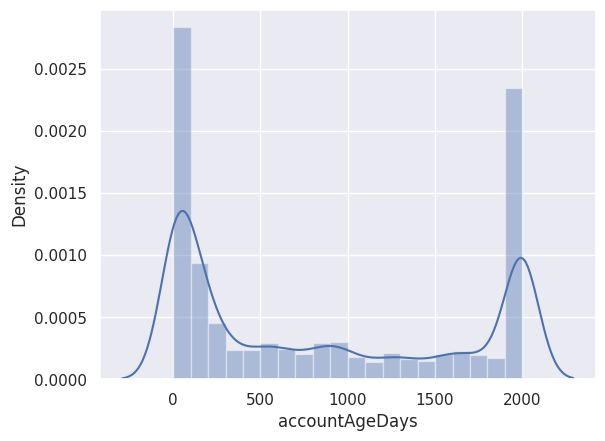

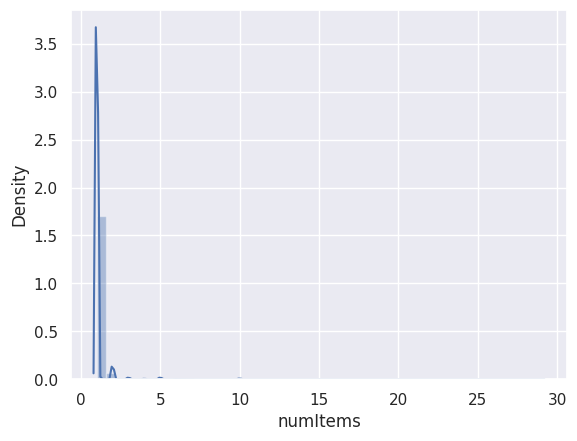

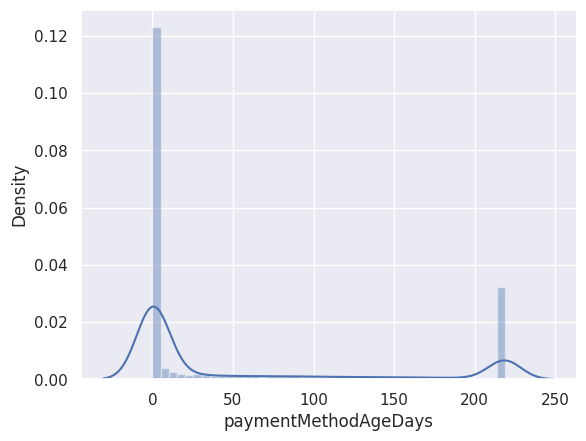

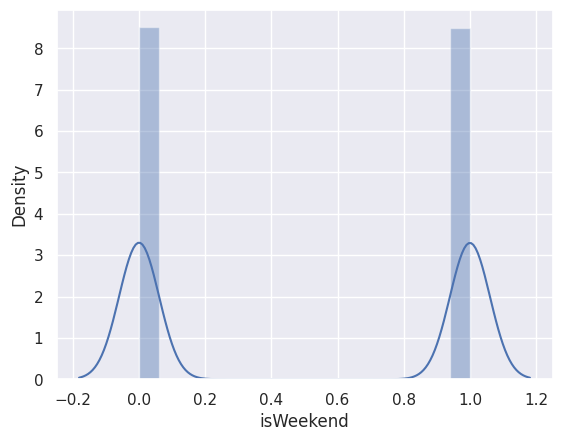

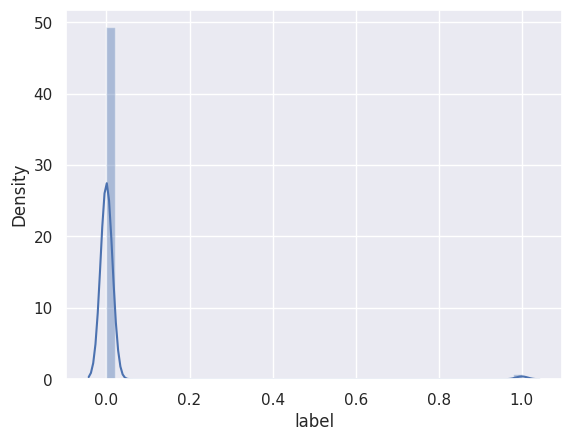

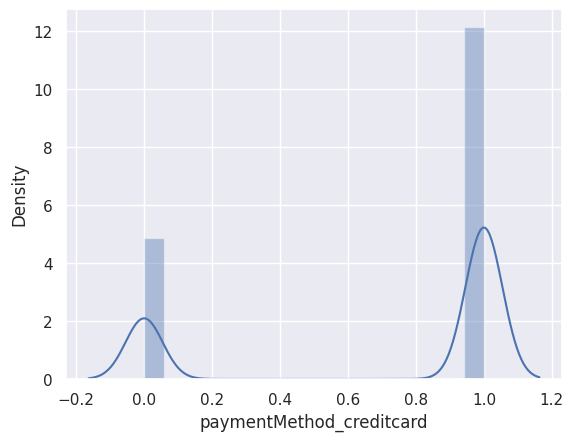

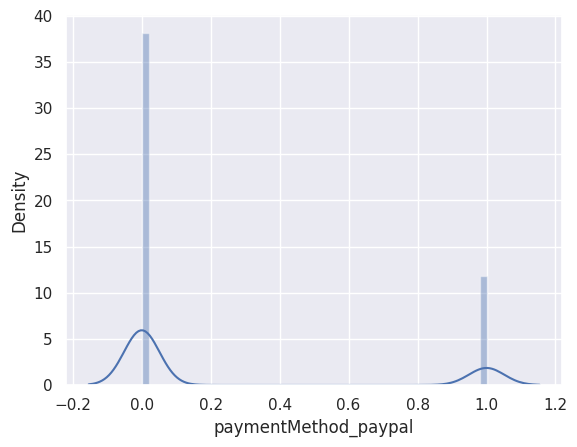

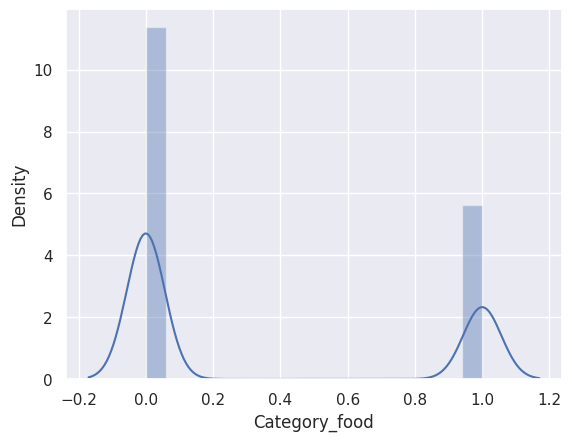

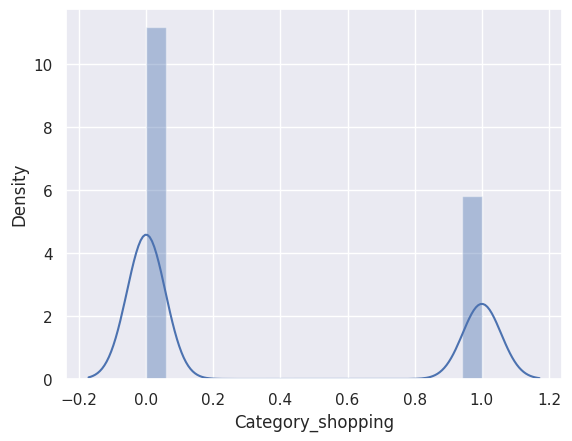

In [77]:
# check outlier with all variable at one go
def distplots(col):
    sns.distplot(df[col])
    plt.show()
    
for i in list(df.columns[0:2]):
    distplots(i)
for i in list(df.columns[3:]):
    distplots(i)    

# dividing dataset into dv and idv

In [78]:
order = ['accountAgeDays', 'numItems', 'localTime', 'paymentMethodAgeDays',
       'isWeekend', 'paymentMethod_creditcard',
       'paymentMethod_paypal', 'Category_food', 'Category_shopping','label']
df = df[order]

In [79]:
x = df.drop(['label','isWeekend'], axis=1)
y=df[['label']]

In [80]:
x.head(3)

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,paymentMethod_creditcard,paymentMethod_paypal,Category_food,Category_shopping
0,29,1,4.745402,28.204861,0,1,0,1
1,725,1,4.742303,0.000000,0,0,0,0
2,845,1,4.921318,0.000000,1,0,1,0


In [81]:
y.head()

,label
0,0
1,0
2,0
3,0
4,0


In [82]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   accountAgeDays            39221 non-null  int64  
 1   numItems                  39221 non-null  int64  
 2   localTime                 39221 non-null  float64
 3   paymentMethodAgeDays      39221 non-null  float64
 4   paymentMethod_creditcard  39221 non-null  int64  
 5   paymentMethod_paypal      39221 non-null  int64  
 6   Category_food             39221 non-null  int64  
 7   Category_shopping         39221 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.4 MB


In [83]:
x.describe()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,paymentMethod_creditcard,paymentMethod_paypal,Category_food,Category_shopping
count,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000
mean,857.563984,1.084751,4.748232,52.899260,0.714005,0.237194,0.330537,0.342240
std,804.788212,0.566899,0.389360,84.543995,0.451893,0.425368,0.470413,0.474466
min,1.000000,1.000000,0.421214,0.000000,0.000000,0.000000,0.000000,0.000000
25%,72.000000,1.000000,4.742303,0.000000,0.000000,0.000000,0.000000,0.000000
50%,603.000000,1.000000,4.886641,0.012500,1.000000,0.000000,0.000000,0.000000
75%,1804.000000,1.000000,4.962055,87.510417,1.000000,0.000000,1.000000,1.000000
max,2000.000000,29.000000,5.040929,218.776042,1.000000,1.000000,1.000000,1.000000


In [84]:
from sklearn.preprocessing import Normalizer
nor = Normalizer()
x_fs_nor = nor.fit_transform(x)
normalized_x = pd.DataFrame(x_fs_nor, columns=x.columns)
normalized_x.head()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,paymentMethod_creditcard,paymentMethod_paypal,Category_food,Category_shopping
0,0.711342,0.024529,0.116400,0.691838,0.000000,0.024529,0.000000,0.024529
1,0.999978,0.001379,0.006541,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.999981,0.001183,0.005824,0.000000,0.001183,0.000000,0.001183,0.000000
3,0.999949,0.001988,0.009714,0.000000,0.001988,0.000000,0.000000,0.000000
4,0.999996,0.000500,0.002520,0.000000,0.000500,0.000000,0.000000,0.000500


In [85]:
normalized_x.tail()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,paymentMethod_creditcard,paymentMethod_paypal,Category_food,Category_shopping
39216,0.999986,0.001014,0.004906,0.000000,0.001014,0.000000,0.0,0.001014
39217,0.991288,0.000602,0.002935,0.131676,0.000602,0.000000,0.0,0.000602
39218,0.999995,0.000629,0.002981,0.000000,0.000629,0.000000,0.0,0.000629
39219,0.734697,0.003100,0.015256,0.678203,0.003100,0.000000,0.0,0.003100
39220,0.999808,0.003676,0.018529,0.000003,0.000000,0.003676,0.0,0.003676


In [86]:
normalized_x.describe()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,paymentMethod_creditcard,paymentMethod_paypal,Category_food,Category_shopping
count,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000
mean,0.906425,0.025905,0.112011,0.133041,0.016974,0.005614,0.007831,0.008147
std,0.179576,0.058626,0.235026,0.227012,0.043977,0.026334,0.030672,0.031761
min,0.088247,0.000497,0.001290,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.931468,0.000564,0.002614,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.996710,0.001718,0.007758,0.000088,0.000634,0.000000,0.000000,0.000000
75%,0.999983,0.012956,0.057024,0.132466,0.005360,0.000000,0.000544,0.000581
max,0.999999,0.891203,0.962739,0.706966,0.320414,0.320414,0.305133,0.320414


In [87]:
y.value_counts()

label
0        38661
1          560
Name: count, dtype: int64

# dataset is imbalanced
# *majority >= minority*2  -> imbalanced dataset*
# Using smote to handle it

In [88]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(normalized_x, y)

In [117]:
print("Before\n",y.value_counts())
print()
print("After\n",y_smote.value_counts())

Before
 label
0        38661
1          560
Name: count, dtype: int64

After
 label
0        38661
1        38661
Name: count, dtype: int64


In [90]:
print(x_smote.shape, y_smote.shape)

(77322, 8) (77322, 1)


In [91]:
x_smote.head(1)

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,paymentMethod_creditcard,paymentMethod_paypal,Category_food,Category_shopping
0,0.711342,0.024529,0.1164,0.691838,0.0,0.024529,0.0,0.024529


In [92]:
df.head(1)

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,isWeekend,paymentMethod_creditcard,paymentMethod_paypal,Category_food,Category_shopping,label
0,29,1,4.745402,28.204861,0.0,0,1,0,1,0


# we have to build model and predict with x_smote amd y_smote datset
# splitting data into train and test

In [93]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.25, random_state=1, stratify= y_smote)
# stratify = model takes both 1 and 0 data

In [94]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)

LogisticRegression()

In [95]:
x_train.head()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,paymentMethod_creditcard,paymentMethod_paypal,Category_food,Category_shopping
7046,0.994067,0.000497,0.002502,0.108739,0.000497,0.0,0.000000,0.000497
9040,0.778029,0.129671,0.586709,0.000090,0.129671,0.0,0.129671,0.000000
39044,0.986454,0.000750,0.003722,0.163991,0.000750,0.0,0.000000,0.000750
8704,0.498484,0.166161,0.817732,0.000000,0.166161,0.0,0.166161,0.000000
22015,0.932680,0.004038,0.019690,0.360099,0.004038,0.0,0.004038,0.000000


In [96]:
y_pred_train = logit_model.predict(x_train)
y_pred_test = logit_model.predict(x_test)

In [97]:
# Evalualte the model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
y_test.head()
y_pred_test

array([1, 1, 1, ..., 1, 0, 0])

In [98]:
print( confusion_matrix(y_train, y_pred_train))
print('*****************************')
print( confusion_matrix(y_test, y_pred_test))

[[28871   125]
 [    0 28995]]
*****************************
[[9620   45]
 [   0 9666]]


In [99]:
print( classification_report(y_train, y_pred_train))
print('*****************************')
print( classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28996
           1       1.00      1.00      1.00     28995

    accuracy                           1.00     57991
   macro avg       1.00      1.00      1.00     57991
weighted avg       1.00      1.00      1.00     57991

*****************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9665
           1       1.00      1.00      1.00      9666

    accuracy                           1.00     19331
   macro avg       1.00      1.00      1.00     19331
weighted avg       1.00      1.00      1.00     19331



In [100]:

print( accuracy_score(y_train, y_pred_train))
print('*****************************')
print( accuracy_score(y_test, y_pred_test))

0.997844493111
*****************************
0.9976721328436191


In [101]:
print( f1_score(y_train, y_pred_train))
print('*****************************')
print( f1_score(y_test, y_pred_test))

0.9978490923169578
*****************************
0.997677659080353


In [118]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(logit_model,x_train, y_train, cv=10)
testing_accuracy = cross_val_score(logit_model, x_test, y_test, cv=10)
print("Train Accuracy: ", training_accuracy)
print("\nTrain Mean Accuracy", training_accuracy.mean())
print("\nTrain Max Accuracy",training_accuracy.max())
print("\nTest Accuracy: ", testing_accuracy)
print("\nTest Mean Accuracy", testing_accuracy.mean())
print("\nTest Max Accuracy",testing_accuracy.max())

Train Accuracy:  [0.99793103 0.99741335 0.99775823 0.99827556 0.99689602 0.99775823
 0.99655113 0.9972409  0.99655113 0.99793068]

Train Mean Accuracy 0.9974306271592607

Train Max Accuracy 0.9982755647525435

Test Accuracy:  [0.98862461 0.9932747  0.9881014  0.99224004 0.99275737 0.99224004
 0.99482669 0.99068805 0.99586136 0.99172271]

Test Mean Accuracy 0.9920336976403412

Test Max Accuracy 0.9958613554061045


In [103]:
from sklearn.ensemble import RandomForestClassifier 
rforest1 = RandomForestClassifier()
rforest1.fit(x_train, y_train)

RandomForestClassifier()

In [104]:
y_pred_rf_train = rforest1.predict(x_train)
y_pred_rf_test = rforest1.predict(x_test)

In [105]:
rforest1.feature_importances_

array([0.37462653, 0.31872896, 0.14305494, 0.02863926, 0.08945354,
       0.02006406, 0.00562879, 0.01980393])

In [119]:
print( confusion_matrix(y_train, y_pred_rf_train))
print('*****************************')
print( confusion_matrix(y_test, y_pred_rf_test))

[[28996     0]
 [    0 28995]]
*****************************
[[9664    1]
 [   0 9666]]


In [106]:
# Evaluate the model
print(classification_report(y_train, y_pred_rf_train))
print()
print(classification_report(y_test, y_pred_rf_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28996
           1       1.00      1.00      1.00     28995

    accuracy                           1.00     57991
   macro avg       1.00      1.00      1.00     57991
weighted avg       1.00      1.00      1.00     57991


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9665
           1       1.00      1.00      1.00      9666

    accuracy                           1.00     19331
   macro avg       1.00      1.00      1.00     19331
weighted avg       1.00      1.00      1.00     19331



In [107]:
print(accuracy_score(y_train, y_pred_rf_train))
print()
print(accuracy_score(y_test, y_pred_rf_test))

1.0

0.999948269618747


In [108]:
from sklearn.model_selection import cross_val_score
test_accuracy = cross_val_score(rforest1, x_test, y_test, cv=10)
test_accuracy

array([1.        , 0.99948267, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [120]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(rforest1,x_train, y_train, cv=10)
testing_accuracy = cross_val_score(rforest1, x_test, y_test, cv=10)
print("Train Accuracy: ", training_accuracy)
print("\nTrain Mean Accuracy", training_accuracy.mean())
print("\nTrain Max Accuracy",training_accuracy.max())
print("\nTest Accuracy: ", testing_accuracy)
print("\nTest Mean Accuracy", testing_accuracy.mean())
print("\nTest Max Accuracy",testing_accuracy.max())

Train Accuracy:  [1.         1.         0.99982756 1.         1.         0.99982756
 1.         1.         1.         0.99965511]

Train Mean Accuracy 0.9999310225901017

Train Max Accuracy 1.0

Test Accuracy:  [1.         0.99948267 1.         1.         1.         1.
 1.         1.         1.         1.        ]

Test Mean Accuracy 0.9999482669425763

Test Max Accuracy 1.0


In [110]:
from sklearn.ensemble import GradientBoostingClassifier
gboost = GradientBoostingClassifier()
gboost.fit(x_train, y_train)

GradientBoostingClassifier()

In [111]:
y_pred_gb_train = gboost.predict(x_train)
y_pred_gb_test = gboost.predict(x_test)

In [121]:
print( confusion_matrix(y_train, y_pred_gb_train))
print('*****************************')
print( confusion_matrix(y_test, y_pred_gb_test))

[[28996     0]
 [    0 28995]]
*****************************
[[9664    1]
 [   3 9663]]


In [112]:
# Evaluate the model
print(classification_report(y_train, y_pred_gb_train))
print()
print(classification_report(y_test, y_pred_gb_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28996
           1       1.00      1.00      1.00     28995

    accuracy                           1.00     57991
   macro avg       1.00      1.00      1.00     57991
weighted avg       1.00      1.00      1.00     57991


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9665
           1       1.00      1.00      1.00      9666

    accuracy                           1.00     19331
   macro avg       1.00      1.00      1.00     19331
weighted avg       1.00      1.00      1.00     19331



In [113]:
print(accuracy_score(y_train, y_pred_gb_train))
print()
print(accuracy_score(y_test, y_pred_gb_test))

1.0

0.9997930784749883


In [115]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(gboost,x_train, y_train, cv=10)
testing_accuracy = cross_val_score(gboost, x_test, y_test, cv=10)
print("Train Accuracy: ", training_accuracy)
print()
print("\nTrain Mean Accuracy", training_accuracy.mean())
print("\nTrain Max Accuracy",training_accuracy.max())
print("\nTest Accuracy: ", testing_accuracy)
print("\nTest Mean Accuracy", testing_accuracy.mean())
print("Test Max Accuracy",testing_accuracy.max())

Train Accuracy:  [1.         0.99982756 0.99965511 1.         1.         1.
 1.         1.         1.         0.99982756]

Train Mean Accuracy 0.9999310225901018

Train Max Accuracy 1.0

Test Accuracy:  [1.         0.99948267 1.         1.         1.         1.
 1.         1.         1.         1.        ]

Test Mean Accuracy 0.9999482669425763

Test Max Accuracy 1.0
